# Import and Sanity Check

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import calmap
import numpy as np


# parses the data from a "Month Date Year" format to a numeric "Year-Month-Date" format
custom_date_parser = lambda x: dt.datetime.strptime(x, "%B %d %Y")
# read the csv
gun = pd.read_csv('./gunviolence.csv', parse_dates=['incident_date'], date_parser=custom_date_parser)
# show the top 10
gun.head(10)

incident_id incident_date       state        city_or_county  \
0      2128682    2021-09-29    Illinois               Chicago   
1      2127374    2021-09-28    Illinois               Chicago   
2      2128023    2021-09-28   Minnesota           Minneapolis   
3      2126747    2021-09-27    New York  New York (Manhattan)   
4      2126450    2021-09-27    Illinois               Chicago   
5      2125790    2021-09-26    Illinois               Chicago   
6      2125953    2021-09-26  California               Oakland   
7      2126261    2021-09-26  Washington  Seattle (Des Moines)   
8      2125613    2021-09-25    New York                 Utica   
9      2125444    2021-09-25   Tennessee                Athens   

                         address  killed  injured  
0   800 block of N Milwaukee Ave       0      5.0  
1        65th St and Calumet Ave       1      3.0  
2  2700 block of Bloomington Ave       1      3.0  
3                  3964 10th Ave       0      5.0  
4             826 N Ridgeway Ave       1      3.0  
5      800 block of S Albany Ave       0      6.0  
6          1400 block of 8th Ave       0      4.0  
7            22855 Pacific Hwy S       3      3.0  
8         800 block of Mohawk St       0      4.0  
9                       Co Rd 60       4      1.0

In [2]:
# observations and variables of the data frame
gun.shape

(3230, 7)

In [3]:
# all variables of the data frame
list(gun)

['incident_id',
 'incident_date',
 'state',
 'city_or_county',
 'address',
 'killed',
 'injured']

In [4]:
#check completeness of data (# of empty rows) in the major columns we're going to use
# seems like only injured had empty
empty={}
for variable in ['incident_date', 'state', 'city_or_county', 'killed','injured']:
    empty[variable]=len(gun[gun[variable].isnull()==True])
    print(variable,':',empty[variable])

# observations with empty injured columns
gun[gun[variable].isnull()==True]

incident_date : 0
state : 0
city_or_county : 0
killed : 0
injured : 2


incident_id incident_date        state city_or_county address  killed  \
51       2115336    2021-09-05     Missouri          Wyatt       0       4   
107      2089557    2021-08-10  Mississippi     Clarksdale       2       2   

     injured  
51       NaN  
107      NaN

In [5]:
# filling in null values for injured column with 0
gun['injured'].fillna(0, inplace = True)
gun[gun['injured'].isnull()==True]

Empty DataFrame
Columns: [incident_id, incident_date, state, city_or_county, address, killed, injured]
Index: []

In [6]:
# check to see if the dates are all within 2014 to 2021 and seeing if its equal to the number of total observations
len(gun[gun['incident_date'].between('2014-01-01', '2021-12-31', inclusive=True)]) == gun.shape[0]

True

In [7]:
# sorted list of unique states in the dataset
sorted(gun['state'].unique())

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [8]:
# show unique cities grouped by the state it's in
grp_state = (gun.city_or_county.groupby(gun.state)).unique() 
grp_state

state
Alabama                 [Dothan, Montgomery, Birmingham, Fort Deposit,...
Alaska                                                [Anchorage, Palmer]
Arizona                 [Tucson, Phoenix, Mesa, Tolleson, Yuma, Globe,...
Arkansas                [Magnolia, Little Rock, Fort Smith, Atkins, We...
California              [Oakland, Riverside, Los Angeles, San Diego, W...
Colorado                [Denver, Aurora, Colorado Springs, Boulder, Gr...
Connecticut             [Hartford, Waterbury, Bridgeport, Stamford, Ne...
Delaware                        [Wilmington, Claymont, Dover, Harrington]
District of Columbia                                         [Washington]
Florida                 [Miami, Orlando, Lakeland, Gainesville, Wildwo...
Georgia                 [Augusta, Atlanta, Athens, Warner Robins, Maco...
Idaho                                                          [Caldwell]
Illinois                [Chicago, Danville, Blue Island, East Saint Lo...
Indiana                 [Indiana

In [9]:
# check numeric columns
gun.killed.describe()

count    3230.000000
mean        1.057276
std         2.080927
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        59.000000
Name: killed, dtype: float64

In [10]:
# check numeric columns
gun.injured.describe()

count    3230.000000
mean        4.188545
std         8.020533
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max       441.000000
Name: injured, dtype: float64

# Initial Exploration

<AxesSubplot:title={'center':'Total amount of victims per state from 2014 - 2021'}, ylabel='State'>

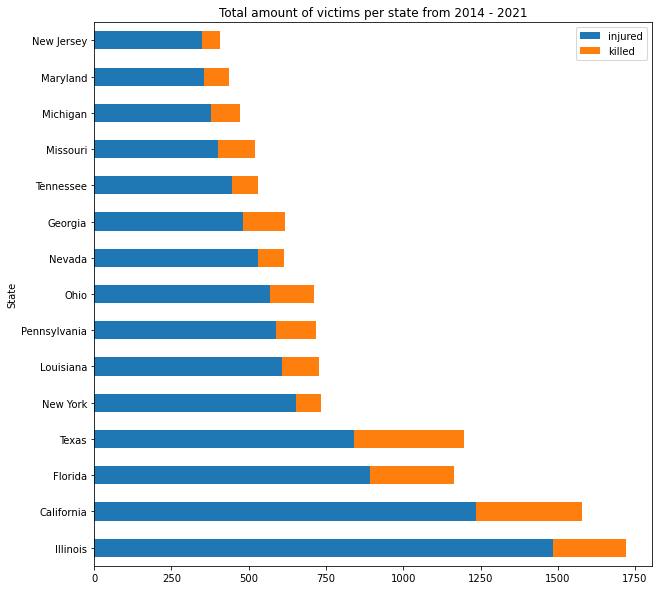

In [11]:
# get the killed columns grouped by the state
grp_state = gun.killed.groupby(gun.state)
# sum up the number of killed and sort the values to descending
sort_killed = (grp_state.sum().sort_values(ascending=False)).to_frame()

# get the injured columns grouped by the state
grp_injured = gun.injured.groupby(gun.state)
# sum up the number of injured and sort the values to descending
sort_injured = (grp_injured.sum().sort_values(ascending=False)).to_frame()

# merge the killed and injured frames and graph
killed_injured  = sort_injured.merge(sort_killed, how='inner', on='state')
(killed_injured.sort_values(by='injured', ascending=False).head(15)).plot(figsize=(10, 10), 
                                                                          kind='barh', 
                                                                          stacked=True,
                                                                          title='Total amount of victims per state from 2014 - 2021',
                                                                          xlabel='State',
                                                                          ylabel='Number of victims (injured and killed)')

<AxesSubplot:title={'center':'Total amount of victims each year from 2014 - 2021'}, ylabel='Year'>

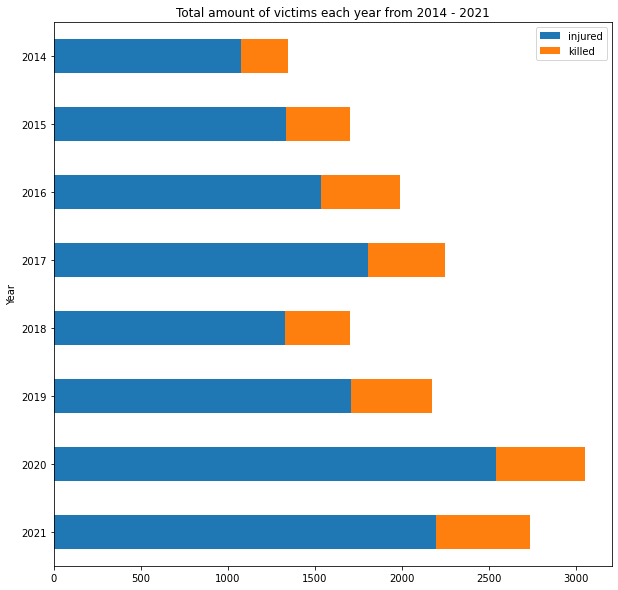

In [12]:
# create a dataframe from the incident date series column
gun['incident_date'] = pd.to_datetime(gun['incident_date'])
# create a new column in the dataframe from the new dataframe incident date column
gun['year'] = gun['incident_date'].dt.year

# get the killed column grouped by the new year column
month_killed = gun.killed.groupby(gun.year)
# divide the sum by 8 for the avg since it's collected in a span of 8 years
sort_mnthkilled = ((month_killed.sum()).sort_values(ascending=False)).to_frame()

# get the injured column grouped by the new year column
month_injured = gun.injured.groupby(gun.year)
# divide the sum by 8 for the avg since it's collected in a span of 8 years
sort_mnthinjured = ((month_injured.sum()).sort_values(ascending=False)).to_frame()

# merge the two sorted groups into a dataframe and graph
mnth_ki = sort_mnthinjured.merge(sort_mnthkilled, how='inner', on='year')
mnth_ki.sort_values(by='year', ascending=True)
(mnth_ki.sort_values(by='year', ascending=False).head(15)).plot(figsize=(10, 10), kind='barh', stacked=True, title='Total amount of victims each year from 2014 - 2021', xlabel='Year', ylabel='Number of victims (injured and killed)')

<AxesSubplot:title={'center':'Average amount of victims each month from 2014 - 2021'}, ylabel='Month'>

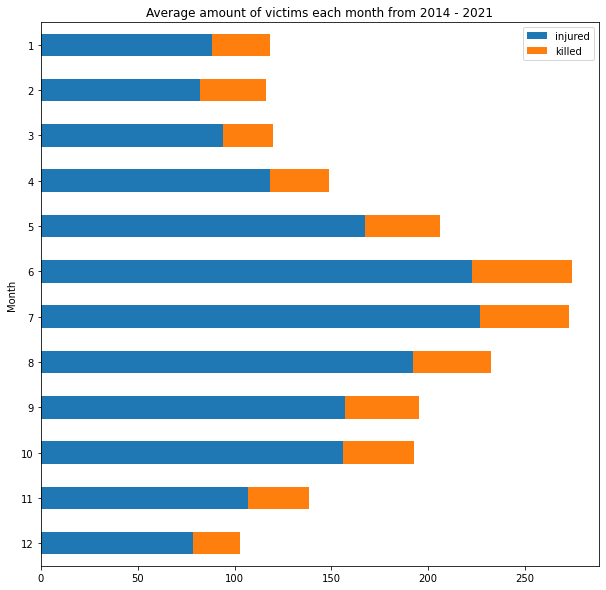

In [13]:
# create a dataframe from the incident date series column
gun['incident_date'] = pd.to_datetime(gun['incident_date'])
# create a new column in the dataframe from the new dataframe incident date column
gun['month'] = gun['incident_date'].dt.month

# get the killed column grouped by the new month column
month_killed = gun.killed.groupby(gun.month)
# divide the sum by 8 for the avg since it's collected in a span of 8 years
sort_mnthkilled = ((month_killed.sum()/8).sort_values(ascending=False)).to_frame()

# get the injured column grouped by the new month column
month_injured = gun.injured.groupby(gun.month)
# divide the sum by 8 for the avg since it's collected in a span of 8 years
sort_mnthinjured = ((month_injured.sum()/8).sort_values(ascending=False)).to_frame()

# merge the two groups and graph
mnth_ki = sort_mnthinjured.merge(sort_mnthkilled, how='inner', on='month')
mnth_ki.sort_values(by='month', ascending=True)
(mnth_ki.sort_values(by='month', ascending=False).head(15)).plot(figsize=(10, 10), kind='barh', stacked=True, title='Average amount of victims each month from 2014 - 2021', xlabel='Month', ylabel='Number of victims (injured and killed)')

(       injured  killed
 month                 
 1         63.0      15
 2         63.0      22
 3         61.0      13
 4         91.0      16
 5         84.0      23
 6        120.0      23
 7        140.0      28
 8        151.0      32
 9         96.0      18
 10        51.0      28
 11        83.0      23
 12        75.0      26,
 <AxesSubplot:title={'center':'Average amount of victims each month from 2014 - 2021'}, ylabel='Month'>)

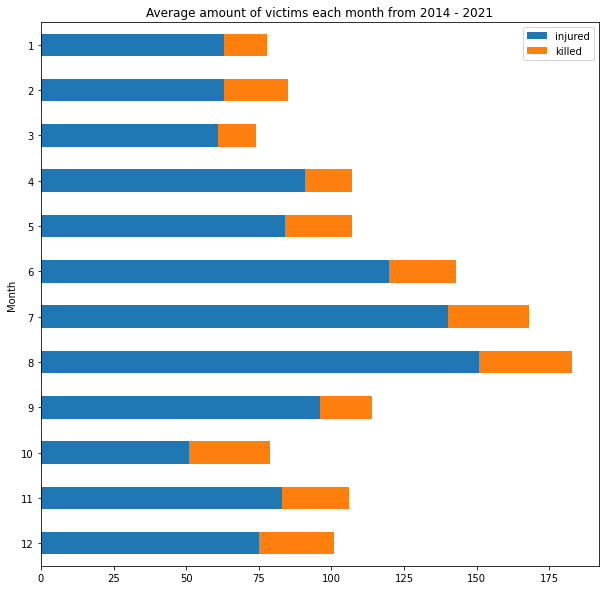

In [14]:
# function to check the monthly distribution of victims in a specified year
def graph_mnthyr(year):
    month_killed = gun[gun['year'] == year].killed.groupby(gun.month)
    month_injured = gun[gun['year'] == year].injured.groupby(gun.month)
    killed_month = (month_killed.sum()).to_frame()
    injured_month = (month_injured.sum()).to_frame()
    plot_mont = injured_month.merge(killed_month, how='inner', on='month')
    return plot_mont.sort_values(by='month', ascending=True), (plot_mont.sort_values(by='month', ascending=False).head(15)).plot(figsize=(10, 10), kind='barh', stacked=True, title='Average amount of victims each month from 2014 - 2021', xlabel='Month', ylabel='Number of victims (injured and killed)')

graph_mnthyr(2014)

<AxesSubplot:title={'center':'Total amount of victims each year from 2014 - 2021'}, ylabel='Year'>

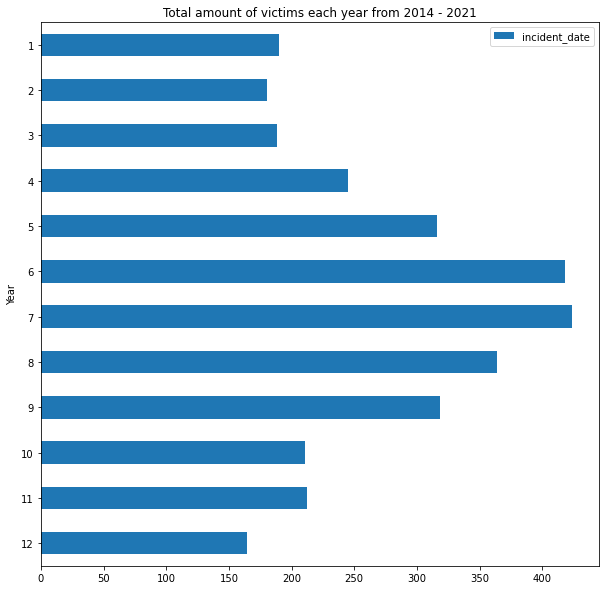

In [15]:
# get the incidents grouped by the state
grp_date = gun.incident_date.groupby(gun.month)
# get the number of total incidents and sort the values to descending
sort_incidents = (grp_date.size().sort_values(ascending=False)).to_frame()
sort_incidents.sort_values(by='month', ascending=True)
(sort_incidents.sort_values(by='month', ascending=False).head(15)).plot(figsize=(10, 10), kind='barh', stacked=True, title='Total amount of victims each year from 2014 - 2021', xlabel='Year', ylabel='Number of victims (injured and killed)')

# Data Analysis

### 1) General Trend Of Gun Violence In The U.S. Throughout Time

In [16]:
# Finding the date range of the gun violence incidents
print("Start Date:",gun['incident_date'].sort_values(ascending=True).head(1),end="\n\n")
print("End Date:",gun['incident_date'].sort_values(ascending=False).head(1))

Start Date: 3229   2014-01-01
Name: incident_date, dtype: datetime64[ns]

End Date: 0   2021-09-29
Name: incident_date, dtype: datetime64[ns]


In [17]:
# Creating a new dataframe that includes all days to determine the trend of national gun violence over time
dates = pd.DataFrame(pd.date_range(start='2014-01-01', end="2021-09-29"))
dates.rename({0:'incident_date'}, axis=1, inplace=True)
allDates = gun.merge(dates, how="right", on="incident_date")
allDates['injured'].fillna(0, inplace=True)
allDates['killed'].fillna(0, inplace=True)
allDates['injured'] = allDates['injured'].astype(int)
allDates['killed'] = allDates['killed'].astype(int)
allDates['year'].fillna(allDates['incident_date'].dt.year, inplace=True)
allDates['year'] = allDates['year'].astype(int)
allDates['month'].fillna(allDates['incident_date'].dt.month, inplace=True)
allDates['month'] = allDates['month'].astype(int)
allDates['all_incidents'] = allDates['injured'] + allDates['killed']

<AxesSubplot:title={'center':'Daily Gun Violence Cases 2021'}, xlabel='Date Of Incident', ylabel='Number Of Occurrences'>

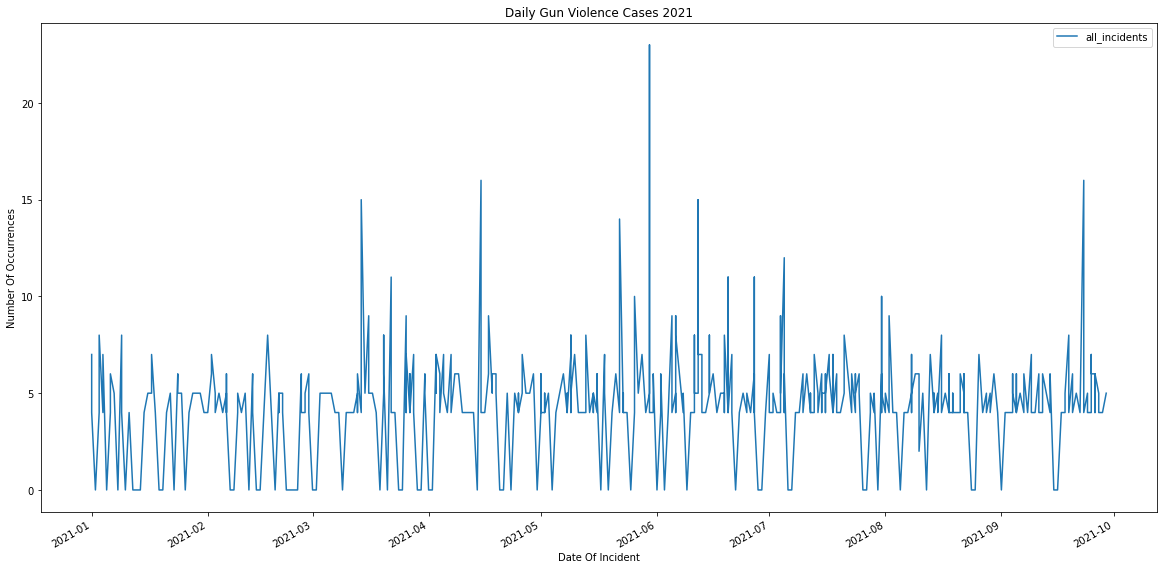

In [18]:
# general trend of national gun violence injuries in 2021
injuries = allDates[allDates['year'] == 2021]
injuries.plot(x='incident_date', y='all_incidents', figsize=(20,10), 
                  title="Daily Gun Violence Cases 2021", xlabel="Date Of Incident", ylabel="Number Of Occurrences")

### 2) Comparing The Average Gun Violence Incidents Per Year Between A State And The National Average

In [19]:
gun['all_incidents'] = gun['killed'] + gun['injured']
gun['all_incidents'] = gun['all_incidents'].astype(int)

In [20]:
# determine the national average of gun violence incidents per year
national_incidents_avg = pd.DataFrame(gun.groupby('year')['all_incidents'].agg('mean'))
national_incidents_avg.reset_index(inplace=True)

# determine the average gun violence incidents per year per state
state_incidents_avg = pd.DataFrame(gun.groupby(['state', 'year'])['all_incidents'].agg('mean'))
state_incidents_avg.reset_index(inplace=True)

In [21]:
# function to compare the average national gun violence injuries to a specified state's average per year
def compare_state_injuries(state):
    t = state + " average gun violence incidents compared to national average"
    state_incidents = pd.DataFrame(state_incidents_avg[state_incidents_avg['state'] == state])
    merged = state_incidents.merge(national_incidents_avg, how='right', on='year')
    merged.rename({'all_incidents_x':'state_avg', 'all_incidents_y':'national_avg'}, axis=1, inplace=True)
    return merged.plot(x='year',y=['state_avg','national_avg'], kind='barh', figsize=(10,5),
                      title=t, ylabel = "Year", xticks=[])

<AxesSubplot:title={'center':'Texas average gun violence incidents compared to national average'}, ylabel='year'>

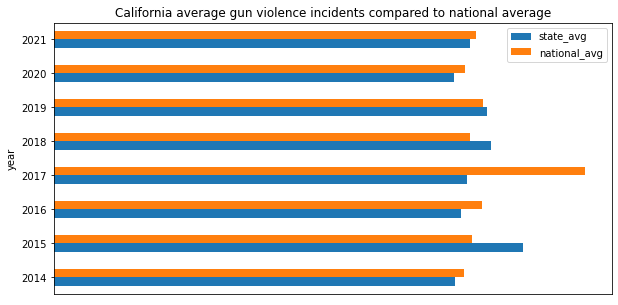

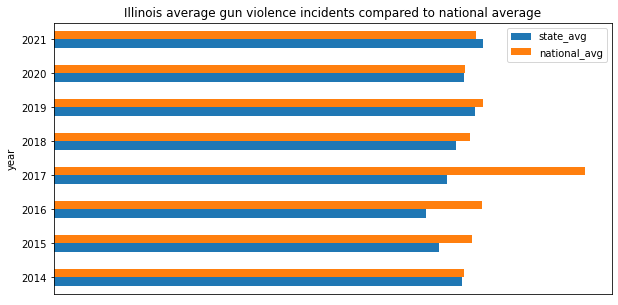

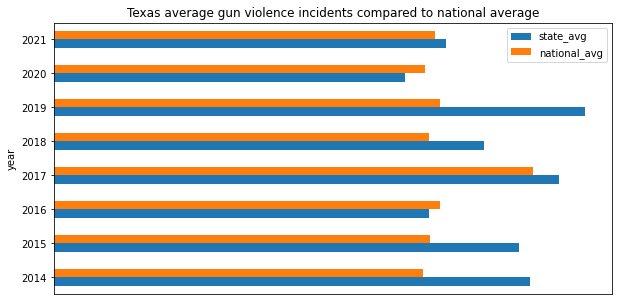

In [22]:
# Comparing 3 states' average gun violence incidents to the national average per year
compare_state_injuries('California')
compare_state_injuries('Illinois')
compare_state_injuries('Texas')

<AxesSubplot:title={'center':'Idaho average gun violence incidents compared to national average'}, ylabel='year'>

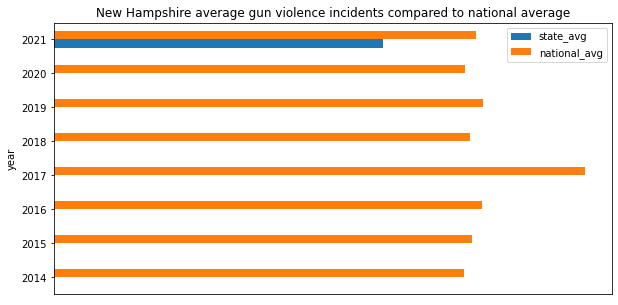

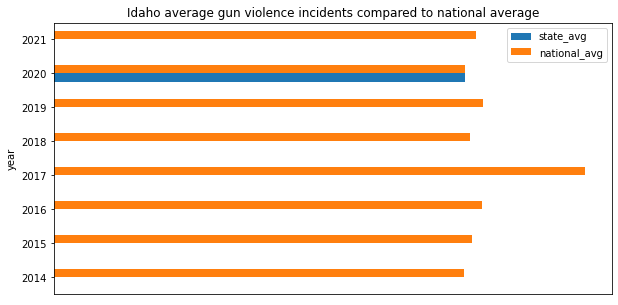

In [23]:
# Comparing the 2 states with the lowest incidents of gun violence per 100,000 people to the national average per year
compare_state_injuries('New Hampshire')
compare_state_injuries('Idaho')

# Section 2: State Trends
What are the states with the most incidents (injured and killed) due to gun violence? 

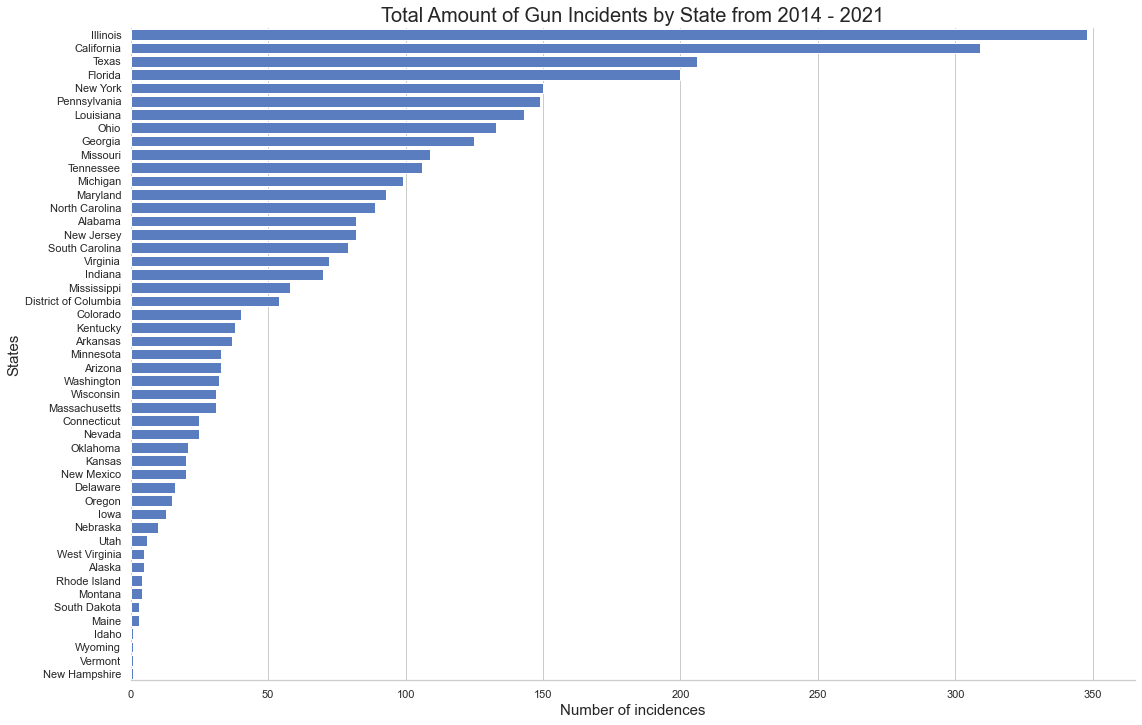

In [24]:
#States with the most recorded absolute incidences

#Set plot parameters
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18,12))
state = gun['state'].value_counts()
sns.set_color_codes("muted")


#Plot incident coutns by state
sns.barplot(x=state.values,
            y=state.index,
           color = 'b')

#Set Labels
plt.xlabel("Number of incidences",fontsize=15)
plt.ylabel("States",fontsize=15)
plt.title("Total Amount of Gun Incidents by State from 2014 - 2021",fontsize=20)
sns.despine(left=True,right=True)
plt.show()

##### Population Adjusted Incidents (Incidents Per 100,000 People by State )

Exploring how many gun incidents occur in different states per 100,000 people. This will will control for population effects, an help dentify the states with a high number of incidents per capita.

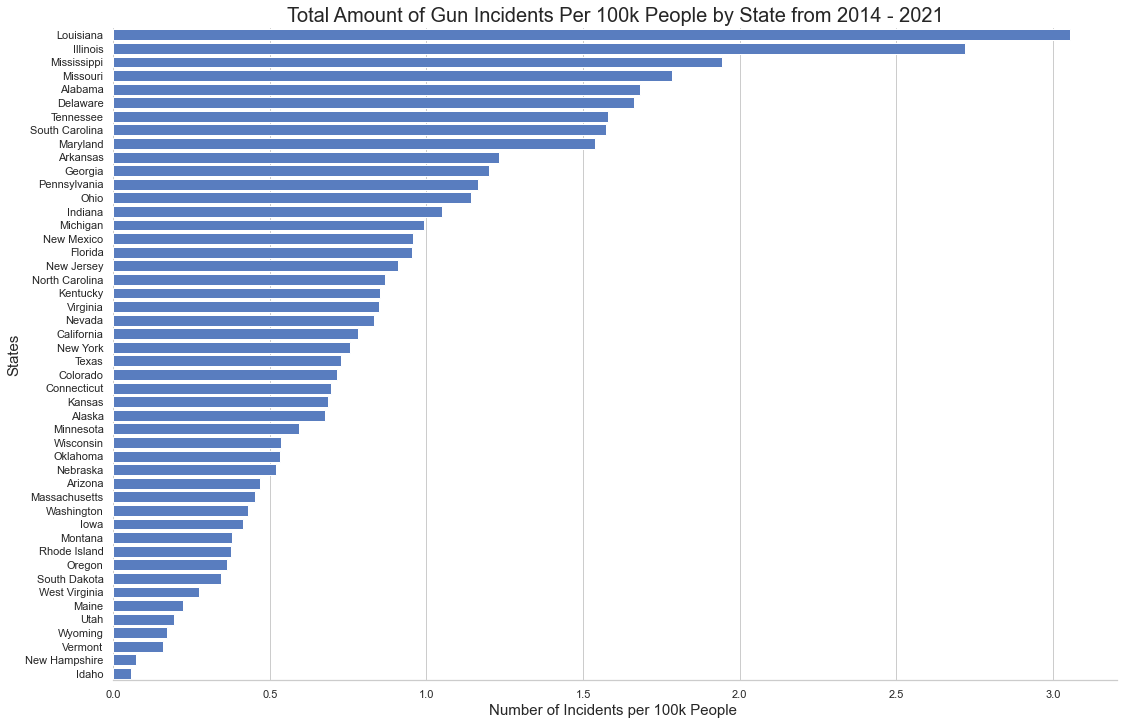

In [25]:
# Population Adjusted Incidents (Incidents Per 100,000 People by State )

#set df with victims varables
df = gun
df['victims'] = df['killed'] + df['injured']

#Set DataFrames values
states_df = df['state'].value_counts()
statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values

#Create variables for incident rates
killed_rates = df.groupby('state')['killed'].sum().sort_values(ascending = False)
victims_rates = df.groupby('state')['victims'].sum().sort_values(ascending = False)
injured_rates = df.groupby('state')['injured'].sum().sort_values(ascending = False)

#merge all data sources together
statesdf = pd.merge(statesdf, injured_rates, left_on = statesdf.state, right_on = injured_rates.index, how = 'left').drop('key_0', axis = 1)
statesdf = pd.merge(statesdf, killed_rates, left_on = statesdf.state, right_on = killed_rates.index, how = 'left').drop('key_0', axis = 1)
statesdf = pd.merge(statesdf, victims_rates, left_on = statesdf.state, right_on = victims_rates.index, how = 'left').drop('key_0', axis = 1)

# Create a DataFrame grouped by state and compute the count, sum and mean
state_df = df.groupby('state').agg({'incident_id':'count', 'killed':['mean', sum], 'injured':['mean',sum], 'victims':['mean', sum]})
state_df.columns = ['_'.join([first, second]) for first, second in zip(state_df.columns.get_level_values(0), state_df.columns.get_level_values(1))]

# Round the data and reset the index for the plot
state_df = state_df.apply(lambda x: round(x, 3)).reset_index()

# Import State Level census data directly from Census.gov
state_pop = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/state/asrh/scprc-est2017-18+pop-res.csv')
census_2017 = dict(zip(state_pop.NAME, state_pop.POPESTIMATE2017))

###Calculate Metrics Per 100,000 People by State 
statesdf['population'] = statesdf['state'].apply(lambda x : census_2017[x])
statesdf['incidents_per_100k'] = statesdf.apply(lambda x : float(x['counts'])*100000 / x['population'], axis=1)
statesdf['killed_per_100k'] = statesdf.apply(lambda x : float(x['killed'])*100000 / x['population'], axis=1)
statesdf['injured_per_100k'] = statesdf.apply(lambda x : float(x['injured'])*100000 / x['population'], axis=1)
statesdf['vicitims_per_100k'] = statesdf.apply(lambda x : float(x['victims'])*100000 / x['population'], axis=1)


#Removing D.C. from the list because it is an extreme outlier due to it's small size and it is not a state
tempdf = statesdf.sort_values('incidents_per_100k', ascending = False)[1:50]


#Create + Customize Barchart
plt.figure(figsize=(18,12))
sns.barplot(x = "incidents_per_100k",
            y = "state", 
            data=tempdf,
           color = 'b')
        
plt.xlabel("Number of Incidents per 100k People ",fontsize=15)
plt.ylabel("States",fontsize=15)
plt.title("Total Amount of Gun Incidents Per 100k People by State from 2014 - 2021",fontsize=20)
sns.despine(left=True,right=True)
plt.show()

#### Plotting state incidents on the map to demonstate national trends

In [26]:
# Map incidents using map - colored by number of incidents per 100k people by state

#set scale for optimal visability
scl = [[0.0, 'rgb(242,240,247)'],[0.05, 'rgb(218,218,235)'],[0.1, 'rgb(188,189,220)'],\
            [0.2, 'rgb(158,154,200)'],[0.5, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


#Set state abreviations for map 
state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK',
                 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR',
                 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA',
                 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ',
                 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT',
                 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT',
                 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV',
                 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
                 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND',
                 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY',
                 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH',
                 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD',
                 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA',
                 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX',
                 'Nevada': 'NV', 'Maine': 'ME'}

statesdf['state_code'] = statesdf['state'].apply(lambda x : state_to_code[x])

#Remove DC, because it is an outlier and not a state
statesdf = statesdf[statesdf.state != 'District of Columbia']

#set map data
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = statesdf['state_code'],
        z = statesdf['incidents_per_100k'],
        locationmode = 'USA-states',
        text = statesdf['state'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Gun Violence Incidents")
        ) ]

#set map output using plotly
layout = dict(
        title = 'Total Number of Gun Incidents Per 100k People by State (2014 - 2021)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )


#plot map using ploty
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

### 2A) Are there states that have more injuries but not deaths? Vice versa?

In [27]:
# We found that 5 unique states have more total injuries than deaths over the years

print("Number of States with more total deaths than total injuries (2014 - 2021): ",
      int(statesdf[statesdf['killed'] > statesdf['injured']][['state']].count()))

statesdf[statesdf['killed'] > statesdf['injured']][['state','killed','injured']]

Number of States with more total deaths than total injuries (2014 - 2021):  5


state  killed  injured
39  West Virginia      13     12.0
42        Montana      13      6.0
43   South Dakota      11      4.0
44          Maine      12      2.0
47        Vermont       4      0.0

In [28]:
# We found that Wyoming is the only state that has an equal number of injuries and deaths over the years
print("Number of States with equal total injuries and total deaths (2014 - 2021): ",
      int(statesdf[statesdf['killed'] == statesdf['injured']][['state']].count()))


statesdf[statesdf['killed'] == statesdf['injured']][['state','killed','injured']]

Number of States with equal total injuries and total deaths (2014 - 2021):  1


state  killed  injured
46  Wyoming       2      2.0

In [29]:
# The remaining 43 states in the database have more injuries than deaths

print("Number of States with more total injuries than total deaths (2014 - 2021): ",
      int(statesdf[statesdf['killed'] < statesdf['injured']][['state']].count()))

statesdf[statesdf['killed'] < statesdf['injured']][['state','killed','injured']].head(5)

Number of States with more total injuries than total deaths (2014 - 2021):  42


state  killed  injured
0    Illinois     235   1484.0
1  California     344   1235.0
2       Texas     355    840.0
3     Florida     273    892.0
4    New York      82    653.0

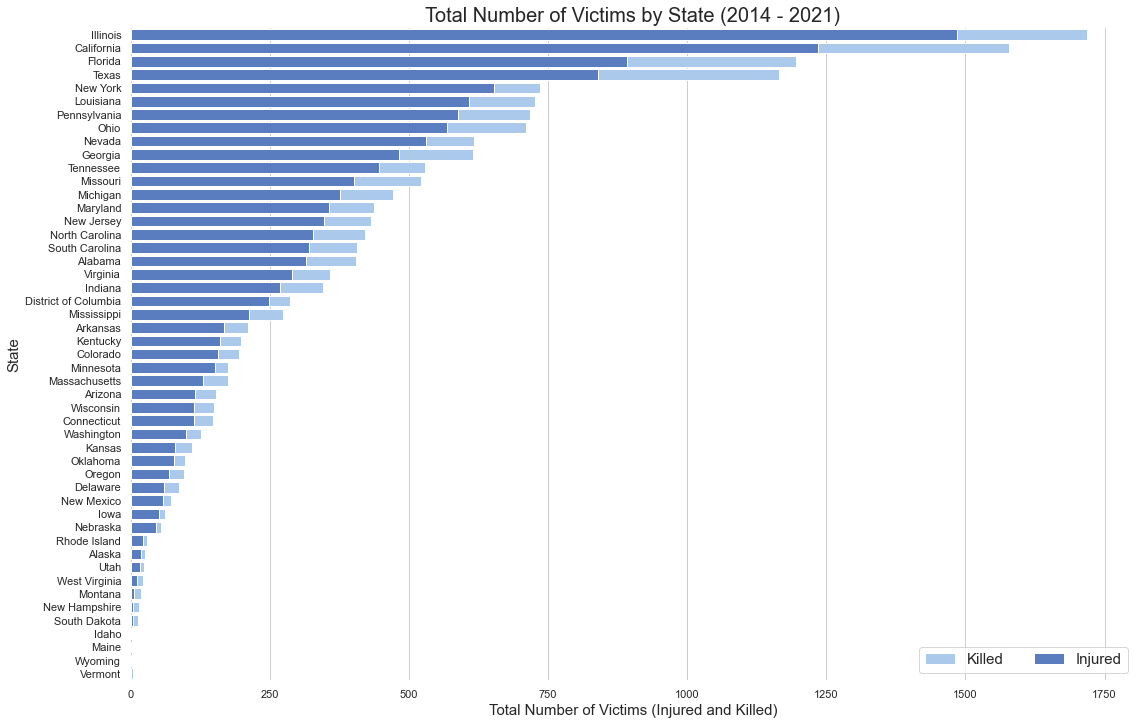

In [30]:


#Set new data frame
df = gun
df['victims'] = df['killed'] + df['injured']

# Initialize plot
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(18, 12))

#set new variables
killed_rates = df.groupby('state')['killed'].sum().sort_values(ascending = False)
victims_rates = df.groupby('state')['victims'].sum().sort_values(ascending = False)
injured_rates = df.groupby('state')['injured'].sum().sort_values(ascending = False)

#Plot victims
sns.set_color_codes("pastel")
sns.barplot(x=victims_rates.values,
            y=victims_rates.index,
            label="Killed",
            color="b")

#Plot Injuries
sns.set_color_codes("muted")
sns.barplot(x=injured_rates.values,
            y=injured_rates.index,
            label="Injured",
            color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True, fontsize=15)
plt.ylabel("State",fontsize=15)
plt.xlabel("Total Number of Victims (Injured and Killed)",fontsize=15)
plt.title('Total Number of Victims by State (2014 - 2021)',fontsize=20)
sns.despine(left=True, bottom=True)

#### Plotting population adjusted deaths and injuries by state to determine the severity of Gun Violence in each state (Quadrients are divided by variable means)

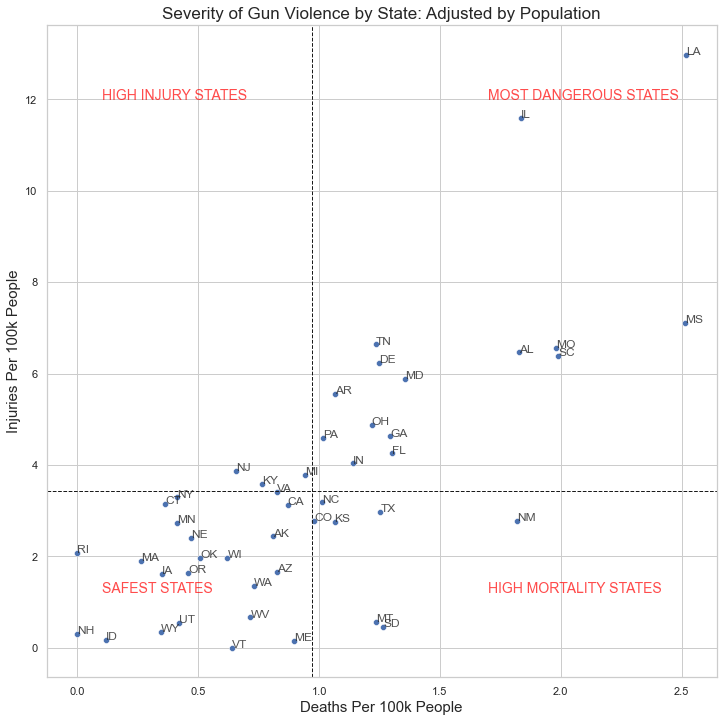

In [31]:
#plot the most dangerous states 

#Remove DC + reset Index
statesdf_nodc = statesdf.sort_values('vicitims_per_100k', ascending = False)[1:50]
statesdf_nodc = statesdf_nodc.reset_index()

#set state abbreviations to make plot less cluttered
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
statesdf_nodc['state_abr'] = statesdf_nodc['state'].apply(lambda x : us_state_to_abbrev[x])

#Set plot size
plt.figure(figsize=(12,12))

#plot data
sns.scatterplot(data=statesdf_nodc, x='killed_per_100k', y='injured_per_100k')

#Set plot labels for each state abbreviation
for i in range(statesdf_nodc.shape[0]):
    plt.text(statesdf_nodc.killed_per_100k[i], y=statesdf_nodc.injured_per_100k[i], s=statesdf_nodc.state_abr[i], alpha=0.8)


#set quadrant labels
plt.text(x=.1, y=12, s="HIGH INJURY STATES",alpha=0.7,fontsize=14, color='red')
plt.text(x=1.7, y=12, s="MOST DANGEROUS STATES",alpha=0.7,fontsize=14, color='red')
plt.text(x=1.7, y=1.2, s="HIGH MORTALITY STATES", alpha=0.7,fontsize=14, color='red')
plt.text(x=.1, y=1.2, s="SAFEST STATES", alpha=0.7,fontsize=14, color='red')          

# Benchmark Mean values          
plt.axhline(y=statesdf_nodc.injured_per_100k.mean(), color='k', linestyle='--', linewidth=1)           
plt.axvline(x=statesdf_nodc.killed_per_100k.mean(), color='k',linestyle='--', linewidth=1) 

#set axis labels
plt.title("Severity of Gun Violence by State: Adjusted by Population", fontsize=17)
plt.xlabel("Deaths Per 100k People", fontsize=15)
plt.ylabel("Injuries Per 100k People", fontsize=15)


#Display the chart
plt.show()

### 3) What are the cities with the most incidents (injured and killed) due to gun violence? 

<AxesSubplot:xlabel='city_or_county'>

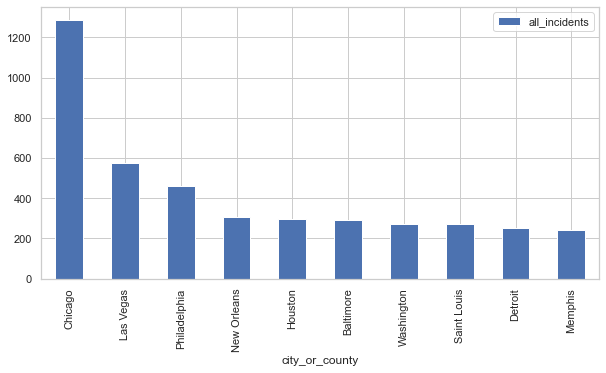

In [32]:
# Find the top 10 cities with the greatest amount of gun violence injuries over time
city_injuries = pd.DataFrame(gun.groupby('city_or_county')['all_incidents'].agg('sum')).sort_values('all_incidents', ascending=False)
top10_injuries = city_injuries.head(10)
top10_injuries.plot(kind='bar', figsize=(10,5))

### 4) Are there cities that have more injuries but not deaths? Vice versa?

In [33]:
# We found that 686 unique cities or counties have a greater injured count than death count over the years
city_injuries = pd.DataFrame(gun.groupby('city_or_county')['injured'].agg('sum'))
city_deaths = pd.DataFrame(gun.groupby('city_or_county')['killed'].agg('sum'))
merged_sums = city_injuries.merge(city_deaths, how='inner', on='city_or_county')
merged_sums[merged_sums['injured'] > merged_sums['killed']]

injured  killed
city_or_county                 
Aiken              11.0       5
Akron              26.0       3
Alachua             5.0       0
Albany             48.0       8
Albion              4.0       0
...                 ...     ...
Youngstown          8.0       2
Yuba City           3.0       2
Yucaipa             5.0       0
Yuma                3.0       1
Zion                3.0       1

[686 rows x 2 columns]

In [34]:
# We found that 153 unique cities or counties have a greater death count than injured count over the years
merged_sums[merged_sums['killed'] > merged_sums['injured']]

injured  killed
city_or_county                 
Abbeville           1.0       3
Aberdeen            3.0       4
Abington            0.0       5
Acworth             1.0       8
Aguanga             0.0       7
...                 ...     ...
Whiteville          1.0       3
Williamsburg        0.0       6
Woodburn            1.0       3
Woodland            1.0       3
Wyatt               0.0       4

[153 rows x 2 columns]

In [35]:
# We found that 62 unique cities or counties have the injured count equal to the death count over the years
merged_sums[merged_sums['killed'] == merged_sums['injured']]

injured  killed
city_or_county                                   
Aliso Viejo                           2.0       2
Arvada                                2.0       2
Batesville                            2.0       2
Bay Saint Louis                       2.0       2
Beachwood (Warrensville Heights)      3.0       3
...                                   ...     ...
Seattle (White Center)                2.0       2
South Houston                         2.0       2
Tuskegee                              2.0       2
Waycross                              2.0       2
Woodbridge (Lake Ridge)               2.0       2

[62 rows x 2 columns]

### 5) How does a city and its state compare in gun violence incidents? 

In [36]:
# function that shows the average number of deaths due to gun violence in cities of a specific state
# there will be a horizontal line that represents the state's average number of deaths
# this way we can see how a city's average number of deaths compare to its' states
def compare_city_incidents(state):
    t = "Average Gun Violence Incidents For The Cities of " + state
    city_incidents = pd.DataFrame(gun.groupby(['state', 'city_or_county'])['all_incidents'].agg('mean'))
    city_incidents.reset_index(inplace=True)
    city_incidents = city_incidents[city_incidents['state'] == state]
    state_avg = pd.DataFrame(gun.groupby('state')['all_incidents'].agg('mean'))
    state_avg.reset_index(inplace=True)
    state_avg = state_avg[state_avg['state'] == state]
    state_avg = float(state_avg.iloc[:,1])
    return city_incidents.plot(x='city_or_county', y='all_incidents', kind='bar', figsize=(20,5),
                              title=t), state_avg

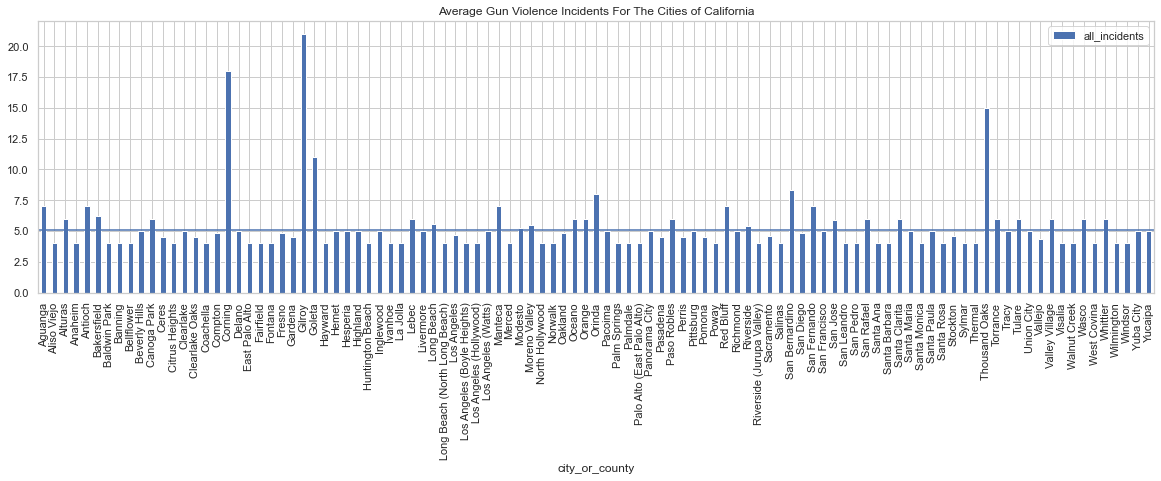

In [37]:
x,state_avg = compare_city_incidents('California')
plt.axhline(y = state_avg)

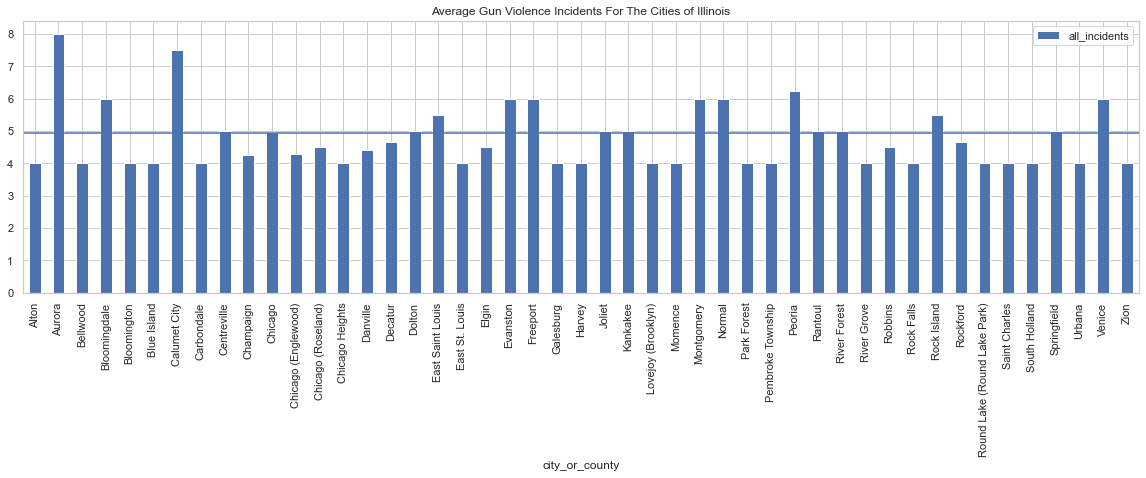

In [38]:
x,state_avg = compare_city_incidents('Illinois')
plt.axhline(y = state_avg)

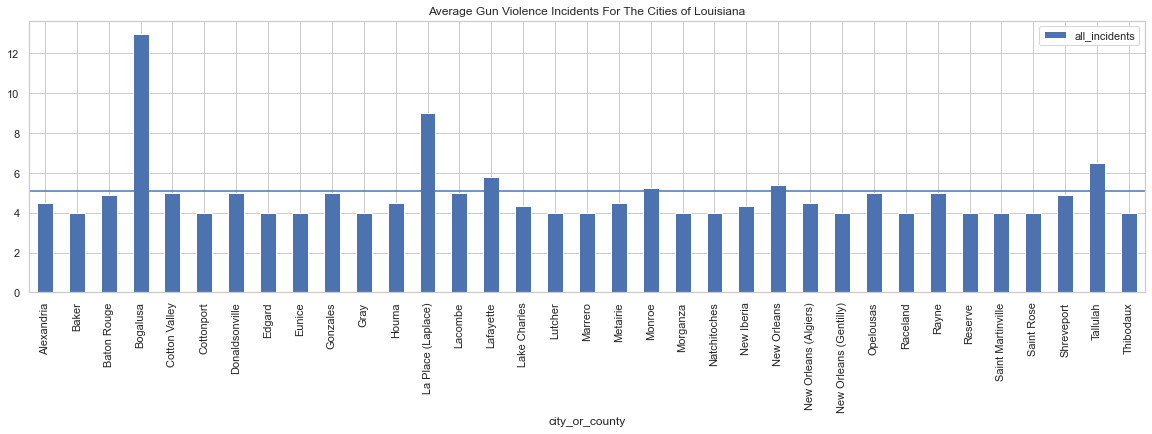

In [39]:
x,state_avg = compare_city_incidents('Louisiana')
plt.axhline(y = state_avg)

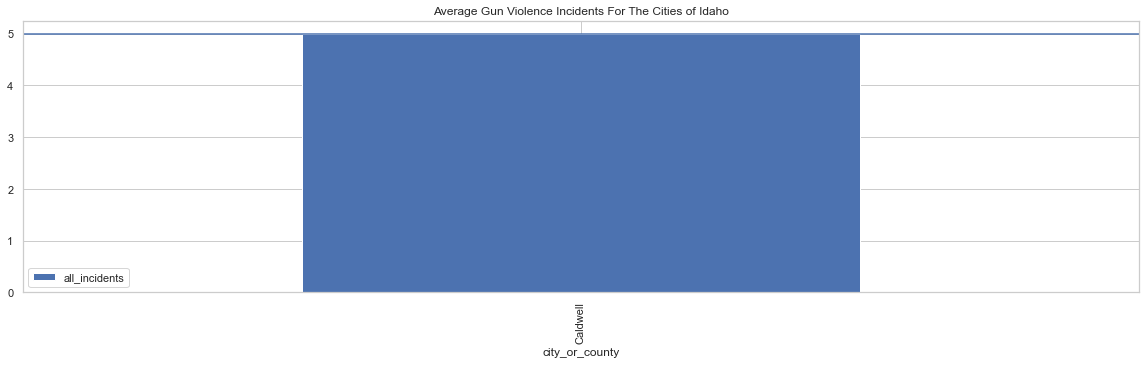

In [40]:
x,state_avg = compare_city_incidents('Idaho')
plt.axhline(y = state_avg)

## Section 4: 
What dates/time period do most gun violence (deaths or injuries) occur generally?  

In [41]:
#Extract time elements from incident_date variable for easy grouping

df['incident_date'] = pd.to_datetime(df['incident_date'])
df['year'], df['month'] = df['incident_date'].dt.year, df['incident_date'].dt.month
df['weekday'] = df['incident_date'].dt.strftime('%A')
df['monthday'] = df['incident_date'].dt.day
df['yearday'] = df['incident_date'].dt.strftime('%m-%d')

df.head(3)

incident_id incident_date      state city_or_county  \
0      2128682    2021-09-29   Illinois        Chicago   
1      2127374    2021-09-28   Illinois        Chicago   
2      2128023    2021-09-28  Minnesota    Minneapolis   

                         address  killed  injured  year  month  all_incidents  \
0   800 block of N Milwaukee Ave       0      5.0  2021      9              5   
1        65th St and Calumet Ave       1      3.0  2021      9              4   
2  2700 block of Bloomington Ave       1      3.0  2021      9              4   

   victims    weekday  monthday yearday  
0      5.0  Wednesday        29   09-29  
1      4.0    Tuesday        28   09-28  
2      4.0    Tuesday        28   09-28

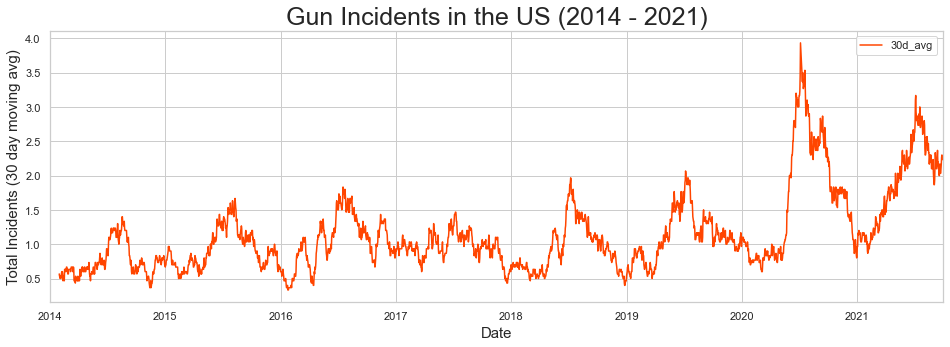

In [42]:
#Group Incidents By Date, and calculating rolling average

#set data frame with date index and rolling 30 day average
incident_df = df.set_index('incident_date')
incident_df = incident_df.groupby(pd.Grouper(freq='d')).agg({'incident_id':'count'}).rename(columns={'incident_id':'incidents'})
incident_df['30d_avg'] = incident_df.iloc[:,0].rolling(window=30).mean()

# Group by day, count incidens, plot graph
incident_df.plot(y='30d_avg',
                figsize=(16,5),
                 title='Daily incidents in the US',
                 color='#ff4500')

#set axis labels
plt.xlabel('Date',fontsize=15)
plt.ylabel('Total Incidents (30 day moving avg)',fontsize=15)
plt.title('Gun Incidents in the US (2014 - 2021)',fontsize=25)
plt.show()

### Section 4:

#### Q4) How does the date affect a city’s or state’s gun violence? Does it have any effect in general?

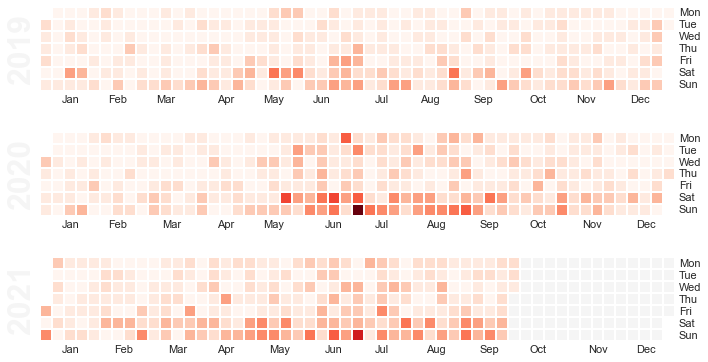

In [43]:
#heatmap calander view to indentify overall trends and dates

#set grouped dataframe for past 3 years with date index
df_date = df.set_index('incident_date')
incident_df = df_date.groupby(pd.Grouper(freq='d')).agg({'incident_id':'count'}).rename(columns={'incident_id':'incidents'})
incident_df = incident_df.loc['2019-01-01':'2021-09-29']

#set plot params
date_series = incident_df.squeeze()
plt.rcParams["figure.figsize"]=10,6

#plot heatmap using calmap
calmap.calendarplot(date_series)
plt.tight_layout()
plt.show()

In [44]:
#Top 5 Most dangerous days in America 

#group by day
day_df = df_date.groupby(df_date.index).agg({'incident_id':'count', 'killed':[sum],'injured':[sum]})
day_df.columns = ['_'.join([first, second]) for first, second in zip(day_df.columns.get_level_values(0), day_df.columns.get_level_values(1))]

#sort by incident count
day_df = day_df.sort_values(by='incident_id_count', ascending=False)

#filter top 5 days
day_df[0:5]

incident_id_count  killed_sum  injured_sum
incident_date                                            
2020-07-05                    15          12         73.0
2021-07-04                    11           7         51.0
2020-06-20                     9           5         39.0
2020-05-23                     9           6         40.0
2021-06-20                     8           9         40.0

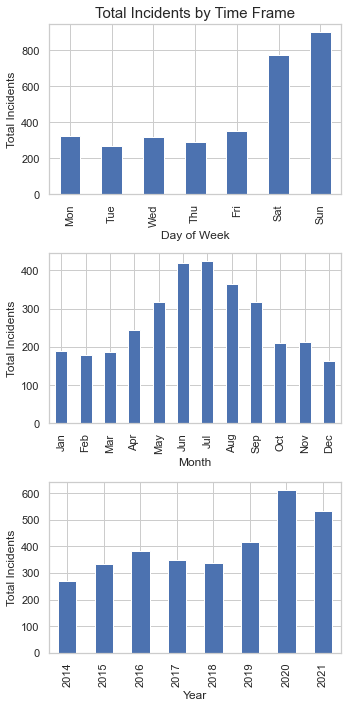

In [45]:
#Time period trends: incidents

#Set index
df = df.set_index('incident_date')

# Compute the DataFrame grouped by weekday, Then rename columns
weekday_df = df.groupby(df.index.weekday).agg({'incident_id':'count', 'killed':[sum],'injured':[sum] })
weekday_df.columns = ['_'.join([first, second]) for first, second in zip(weekday_df.columns.get_level_values(0), weekday_df.columns.get_level_values(1))]


# Compute the DataFrame grouped by month, Then rename columns
month_df = df.groupby(df.index.month).agg({'incident_id':'count', 'killed':[sum],'injured':[sum] })
month_df.columns = ['_'.join([first, second]) for first, second in zip(month_df.columns.get_level_values(0), month_df.columns.get_level_values(1))]

# Compute the DataFrame grouped by year, Then rename columns
year_df = df.groupby(df.index.year).agg({'incident_id':'count', 'killed':[sum],'injured':[sum] })
year_df.columns = ['_'.join([first, second]) for first, second in zip(year_df.columns.get_level_values(0), year_df.columns.get_level_values(1))]

# Create subplots
f, axarr = plt.subplots(3, sharex=False, figsize=(5,10))
weekday_df.incident_id_count.plot(kind='bar',ax=axarr[0], grid=True, linewidth=1)
month_df.incident_id_count.plot(kind='bar',ax=axarr[1], grid=True, linewidth=1)
year_df.incident_id_count.plot(kind='bar',ax=axarr[2], grid=True, linewidth=1)


#Set labels
axarr[0].set_title('Total Incidents by Time Frame', fontsize=15)
axarr[0].set_ylabel('Total Incidents')
axarr[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axarr[1].set_ylabel('Total Incidents')
axarr[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
            'Oct', 'Nov', 'Dec'])
axarr[2].set_ylabel('Total Incidents')
axarr[0].set_xlabel('Day of Week')
axarr[1].set_xlabel('Month')
axarr[2].set_xlabel('Year')
plt.tight_layout()
plt.show()

### Question 4B:
Does the date affect the mortality rate of victims in a gun violence incident (i.e. are victims more likely to be injured than killed if it’s around the summer, etc.)?

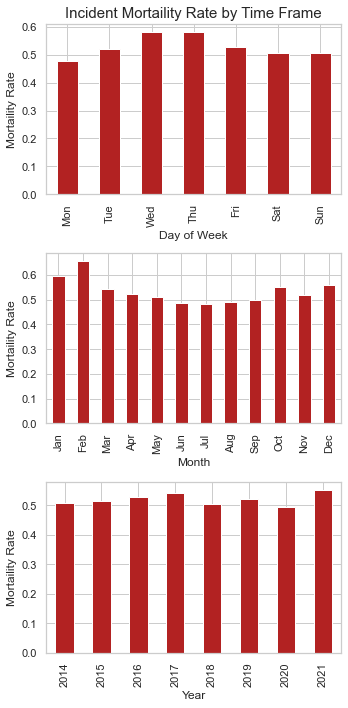

In [56]:
#Time period trends: Mortaility Rate

#create variable if any person was killed in incident
df['any_killed'] = np.where(
    df['killed'] > 0, 1, 0)

# Compute the DataFrame grouped by weekday, Then rename columns
weekday_df = df.groupby(df.index.weekday).agg({'incident_id':'count', 'killed':[sum, 'count'],'injured':[sum], 'any_killed':[sum]})
weekday_df.columns = ['_'.join([first, second]) for first, second in zip(weekday_df.columns.get_level_values(0), weekday_df.columns.get_level_values(1))]
weekday_df['mortality_rate'] = weekday_df['any_killed_sum'] / weekday_df['incident_id_count'] 

# Compute the DataFrame grouped by month, Then rename columns
month_df = df.groupby(df.index.month).agg({'incident_id':'count', 'killed':[sum, 'count'],'injured':[sum], 'any_killed':[sum] })
month_df.columns = ['_'.join([first, second]) for first, second in zip(month_df.columns.get_level_values(0), month_df.columns.get_level_values(1))]
month_df['mortality_rate'] = month_df['any_killed_sum'] / month_df['incident_id_count'] 


# Compute the DataFrame grouped by year, Then rename columns
year_df = df.groupby(df.index.year).agg({'incident_id':'count', 'killed':[sum, 'count'],'injured':[sum], 'any_killed':[sum] })
year_df.columns = ['_'.join([first, second]) for first, second in zip(year_df.columns.get_level_values(0), year_df.columns.get_level_values(1))]
year_df['mortality_rate'] = year_df['any_killed_sum'] / year_df['incident_id_count'] 



# Create subplots
f, axarr = plt.subplots(3, sharex=False, figsize=(5,10))
weekday_df.mortality_rate.plot(kind='bar',ax=axarr[0], grid=True, color='firebrick', linewidth=1)
month_df.mortality_rate.plot(kind='bar',ax=axarr[1], grid=True, color='firebrick', linewidth=1)
year_df.mortality_rate.plot(kind='bar',ax=axarr[2], grid=True,color='firebrick', linewidth=1)

#Set Labels
axarr[0].set_title('Incident Mortaility Rate by Time Frame', fontsize=15)
axarr[0].set_ylabel('Mortaility Rate')
axarr[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axarr[1].set_ylabel('Mortaility Rate')
axarr[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
            'Oct', 'Nov', 'Dec'])
axarr[2].set_ylabel('Mortaility Rate')
axarr[0].set_xlabel('Day of Week')
axarr[1].set_xlabel('Month')
axarr[2].set_xlabel('Year')
plt.tight_layout()
plt.show()

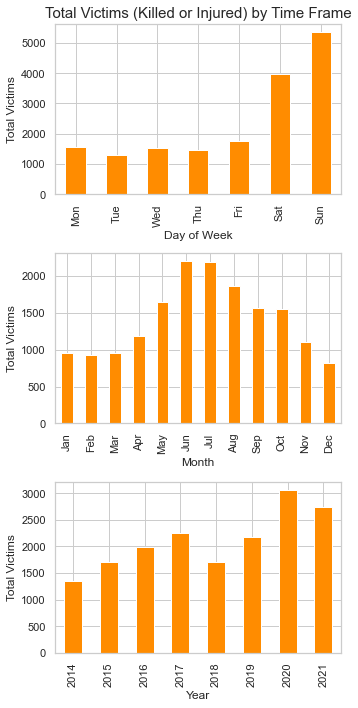

In [57]:
#Time period trends: Total Victims

# Compute the DataFrame grouped by weekday, Then rename columns
weekday_df = df.groupby(df.index.weekday).agg({'incident_id':'count', 'killed':[sum],'injured':[sum],'victims':[sum]})
weekday_df.columns = ['_'.join([first, second]) for first, second in zip(weekday_df.columns.get_level_values(0), weekday_df.columns.get_level_values(1))]

# Compute the DataFrame grouped by month, Then rename columns
month_df = df.groupby(df.index.month).agg({'incident_id':'count', 'killed':[sum],'injured':[sum],'victims':[sum] })
month_df.columns = ['_'.join([first, second]) for first, second in zip(month_df.columns.get_level_values(0), month_df.columns.get_level_values(1))]

# Compute the DataFrame grouped by year, Then rename columns
year_df = df.groupby(df.index.year).agg({'incident_id':'count', 'killed':[sum],'injured':[sum],'victims':[sum] })
year_df.columns = ['_'.join([first, second]) for first, second in zip(year_df.columns.get_level_values(0), year_df.columns.get_level_values(1))]


# Create subplots
f, axarr = plt.subplots(3, sharex=False, figsize=(5,10))
weekday_df.victims_sum.plot(kind='bar',ax=axarr[0], grid=True, color='darkorange', linewidth=1)
month_df.victims_sum.plot(kind='bar',ax=axarr[1], grid=True, color='darkorange', linewidth=1)
year_df.victims_sum.plot(kind='bar',ax=axarr[2], grid=True, color='darkorange', linewidth=1)

#Set Labels
axarr[0].set_title('Total Victims (Killed or Injured) by Time Frame', fontsize=15)
axarr[0].set_ylabel('Total Victims')
axarr[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axarr[1].set_ylabel('Total Victims')
axarr[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
            'Oct', 'Nov', 'Dec'])
axarr[2].set_ylabel('Total Victims')
axarr[0].set_xlabel('Day of Week')
axarr[1].set_xlabel('Month')
axarr[2].set_xlabel('Year')
plt.tight_layout()
plt.show()

### Question 4C:
Are there cities/states that differ from the general time period of frequent gun violence incidents? How so?

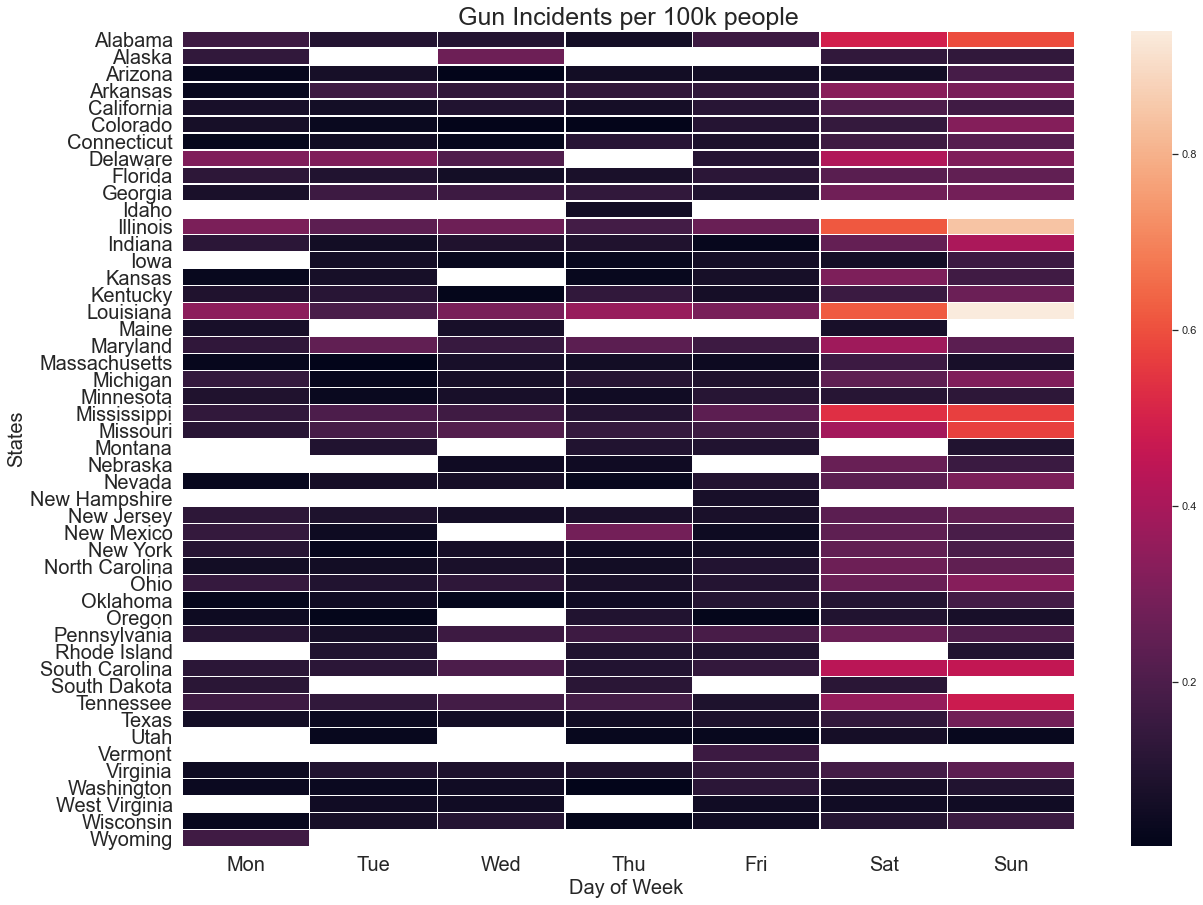

In [48]:
# State Outliers grouping incident counts per 100k people by Day of Week

#Set dataframe grouped by time period
weekday_df2 = df.groupby([df.index.weekday, df.state]).agg({'incident_id':'count' })
weekday_df2.columns = ['_'.join(first) for first in zip(weekday_df2.columns.get_level_values(0))]

# Round the data and reset the index for the plot
weekday_df2 = weekday_df2.apply(lambda x: round(x, 3)).reset_index()

# Import State Level census data directly from Census.gov
state_pop = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/state/asrh/scprc-est2017-18+pop-res.csv')
census_2017 = dict(zip(state_pop.NAME, state_pop.POPESTIMATE2017))

###Calculate Metrics Per 100,000 People by State 
weekday_df2['population'] = weekday_df2['state'].apply(lambda x : census_2017[x])
weekday_df2['incidents_per_100k'] = weekday_df2.apply(lambda x : float(x['incident_id'])*100000 / x['population'], axis=1)

#Remove DC as non-state + outlier
weekday_test = weekday_df2
weekday_test = weekday_df2[weekday_df2.state != "District of Columbia"]


#pivot table for heatmap
df_wide = weekday_test.pivot_table( index='state', columns='incident_date', values='incidents_per_100k')

#plot
fig, ax = plt.subplots(figsize=(20,15))       
sns.heatmap(df_wide, annot=False, linewidths=.5, ax=ax)


#Set Labels
ax.set_title('Gun Incidents per 100k people', fontsize=25)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],fontsize=20)
plt.xlabel("Day of Week ",fontsize=20)
plt.ylabel("States",fontsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.show()

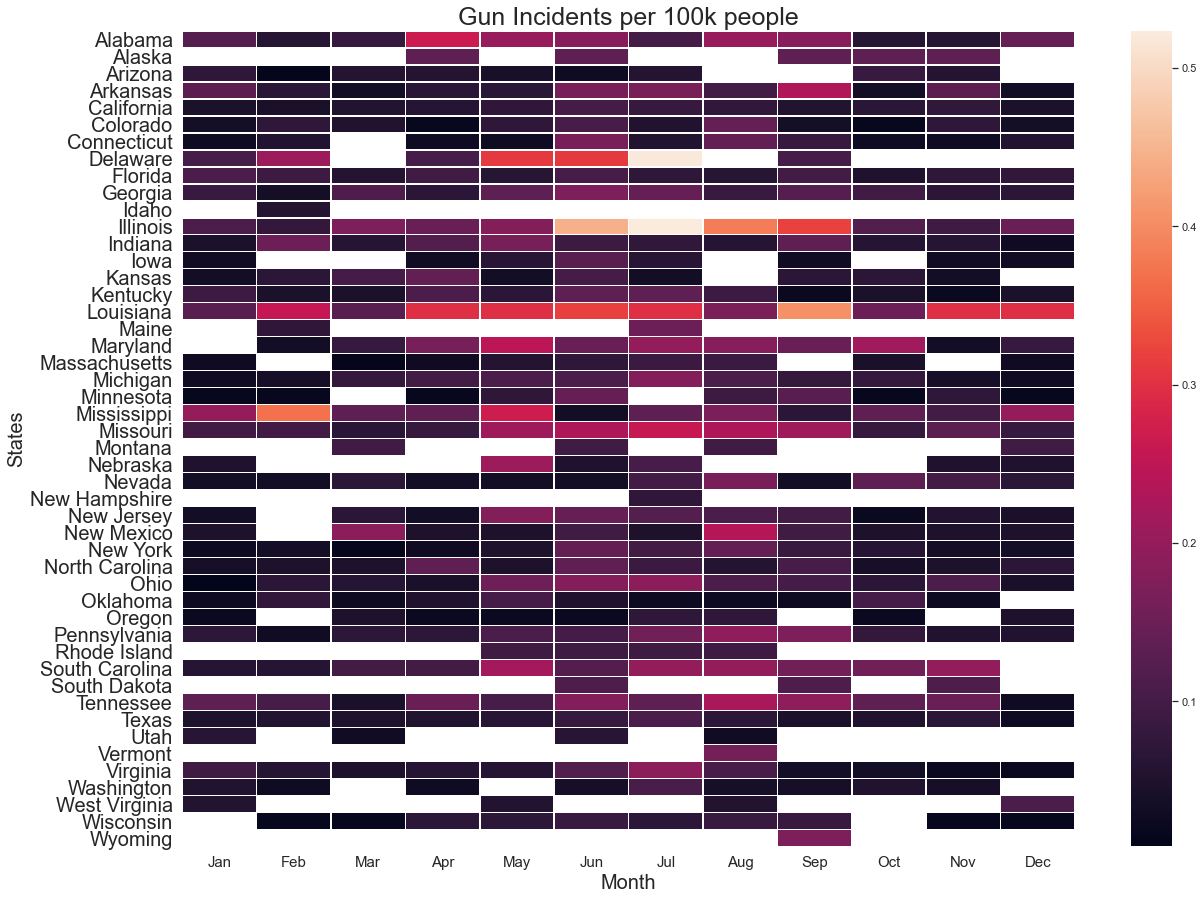

In [49]:
#Looking for State Outliers grouping incident counts per 100k people by Month

#Set dataframe grouped by time period
month_df = df.groupby([df.index.month, df.state]).agg({'incident_id':'count'})
month_df.columns = ['_'.join(first) for first in zip(month_df.columns.get_level_values(0))]
weekday_df2 = month_df

# Round the data and reset the index for the plot
weekday_df2 = weekday_df2.apply(lambda x: round(x, 3)).reset_index()

# Import State Level census data directly from Census.gov
state_pop = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/state/asrh/scprc-est2017-18+pop-res.csv')
census_2017 = dict(zip(state_pop.NAME, state_pop.POPESTIMATE2017))

###Calculate Metrics Per 100,000 People by State 
weekday_df2['population'] = weekday_df2['state'].apply(lambda x : census_2017[x])
weekday_df2['incidents_per_100k'] = weekday_df2.apply(lambda x : float(x['incident_id'])*100000 / x['population'], axis=1)


#Remove DC as outlier
weekday_test = weekday_df2[weekday_df2.state != "District of Columbia"]


#pivot table for heatmap
df_wide = weekday_test.pivot_table( index='state', columns='incident_date', values='incidents_per_100k')

#plot
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_wide, annot=False, linewidths=.5, ax=ax)
ax.set_title('Gun Incidents per 100k people', fontsize=25)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
            'Oct', 'Nov', 'Dec'],fontsize=15)

    
#set Labels
plt.xlabel("Month",fontsize=20)
plt.ylabel("States",fontsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.show()


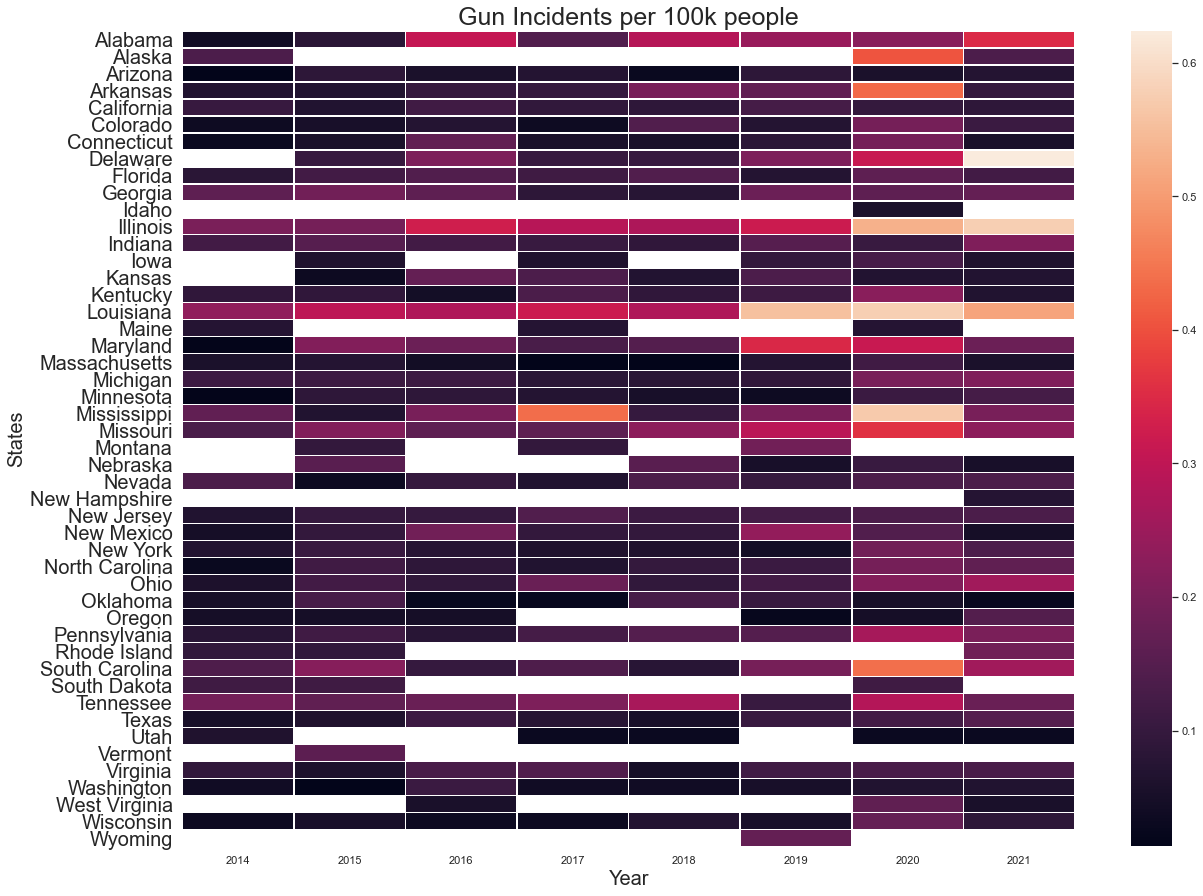

In [50]:
# State Outliers grouping incident counts per 100k people by year

#Set dataframe grouped by time period
year_df = df.groupby([df.index.year, df.state]).agg({'incident_id':'count'})
year_df.columns = ['_'.join(first) for first in zip(year_df.columns.get_level_values(0))]
weekday_df2 = year_df 

# Round the data and reset the index for the plot
weekday_df2 = weekday_df2.apply(lambda x: round(x, 3)).reset_index()

# Import State Level census data directly from Census.gov
state_pop = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/state/asrh/scprc-est2017-18+pop-res.csv')
census_2017 = dict(zip(state_pop.NAME, state_pop.POPESTIMATE2017))

###Calculate Metrics Per 100,000 People by State 
weekday_df2['population'] = weekday_df2['state'].apply(lambda x : census_2017[x])
weekday_df2['incidents_per_100k'] = weekday_df2.apply(lambda x : float(x['incident_id'])*100000 / x['population'], axis=1)

#Remove DC as outlier
weekday_test = weekday_df2[weekday_df2.state != "District of Columbia"]

#pivot table for heatmap
df_wide = weekday_test.pivot_table( index='state', columns='incident_date', values='incidents_per_100k')

#plot
fig, ax = plt.subplots(figsize=(20,15))     
sns.heatmap(df_wide, annot=False, linewidths=.5, ax=ax)
    
#Set Labels
ax.set_title('Gun Incidents per 100k people', fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("States",fontsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.show()


In [51]:
#Shifting to cities, filter  by top 30 cities by incident count

city_injuries = pd.DataFrame(df.groupby('city_or_county')['incident_id'].agg('count')).\
sort_values('incident_id', ascending=False)

cities30 = list(city_injuries.head(30).index)

boolean_series = df.city_or_county.isin(cities30)
city_df = df[boolean_series]

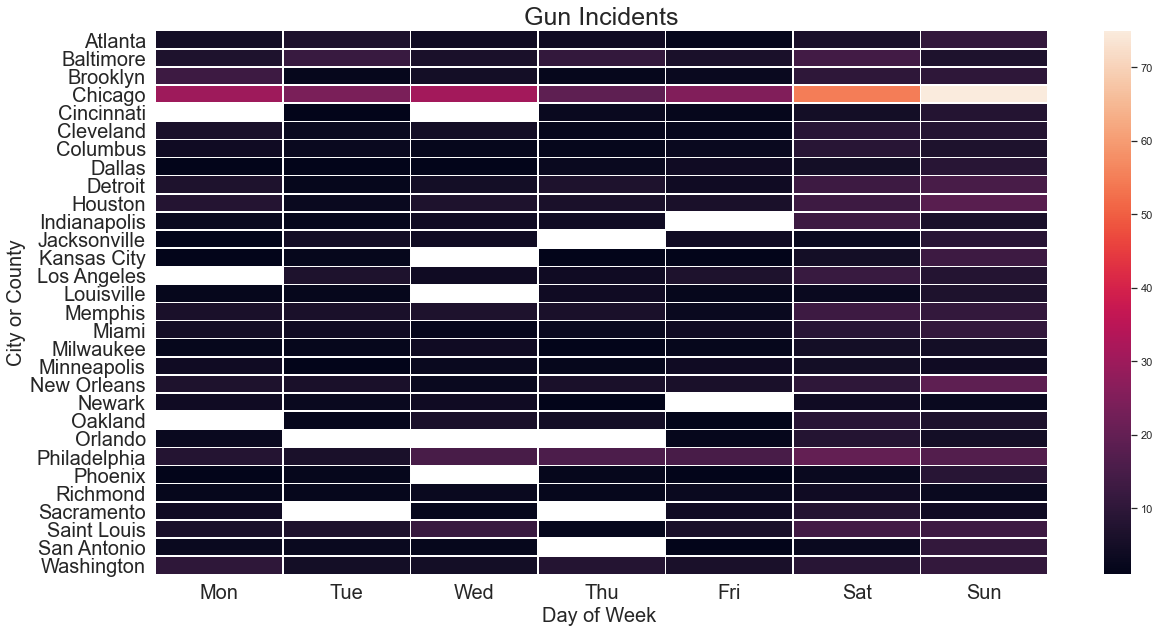

In [52]:
# City Outliers grouping incident counts per 100k people by Day of Week

#Set dataframe grouped by time period
weekday_df2 = city_df.groupby([city_df.index.weekday, city_df.city_or_county]).agg({'incident_id':'count' })
weekday_df2.columns = ['_'.join(first) for first in zip(weekday_df2.columns.get_level_values(0))]
weekday_test = weekday_df2
weekday_test = weekday_test.sort_values(by='incident_id', ascending=False)

#pivot table for heatmap
df_wide = weekday_test.pivot_table( index='city_or_county', columns='incident_date', values='incident_id')

#plot
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(df_wide, annot=False, linewidths=.5, ax=ax)

#Set Axis
ax.set_title('Gun Incidents', fontsize=25)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],fontsize=20)    
plt.xlabel("Day of Week ",fontsize=20)
plt.ylabel("City or County",fontsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)

plt.show()


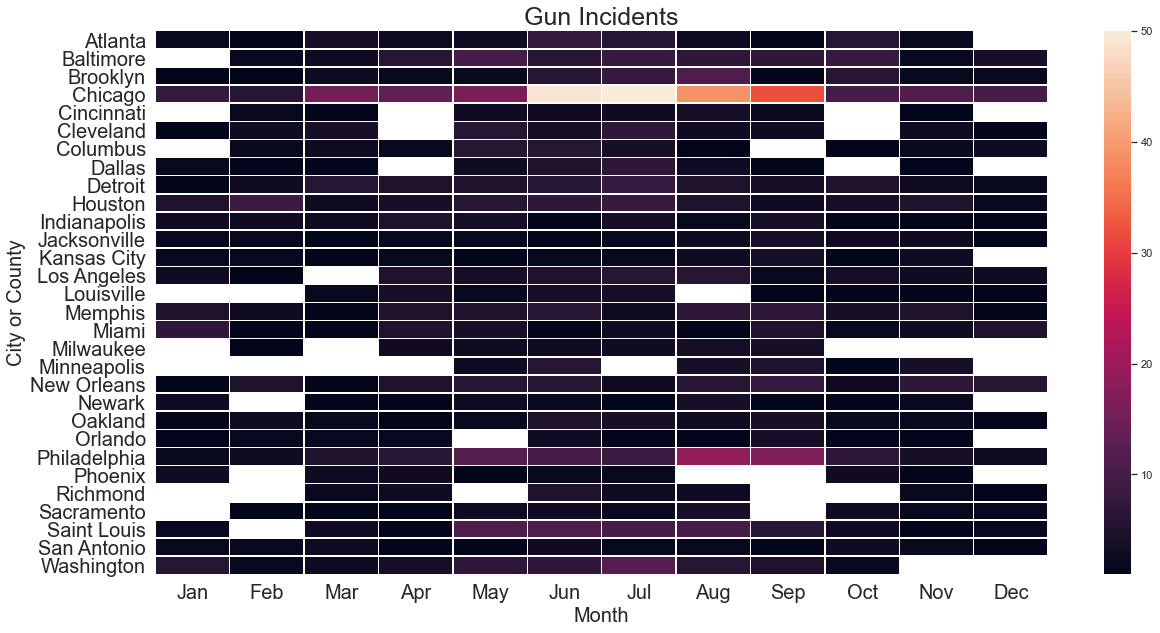

In [53]:
# City Outliers grouping incident counts by Month 

#Set dataframe grouped by time period
weekday_df2 = city_df.groupby([city_df.index.month, city_df.city_or_county]).agg({'incident_id':'count' })
weekday_df2.columns = ['_'.join(first) for first in zip(weekday_df2.columns.get_level_values(0))]
weekday_test = weekday_df2
weekday_test = weekday_test.sort_values(by='incident_id', ascending=False)

#pivot table for heatmap
df_wide = weekday_test.pivot_table( index='city_or_county', columns='incident_date', values='incident_id')

#plot
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(df_wide, annot=False, linewidths=.5, ax=ax)

#Set Axis
ax.set_title('Gun Incidents', fontsize=25)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
            'Oct', 'Nov', 'Dec'],fontsize=20)
plt.xlabel("Month",fontsize=20)
plt.ylabel("City or County",fontsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.show()


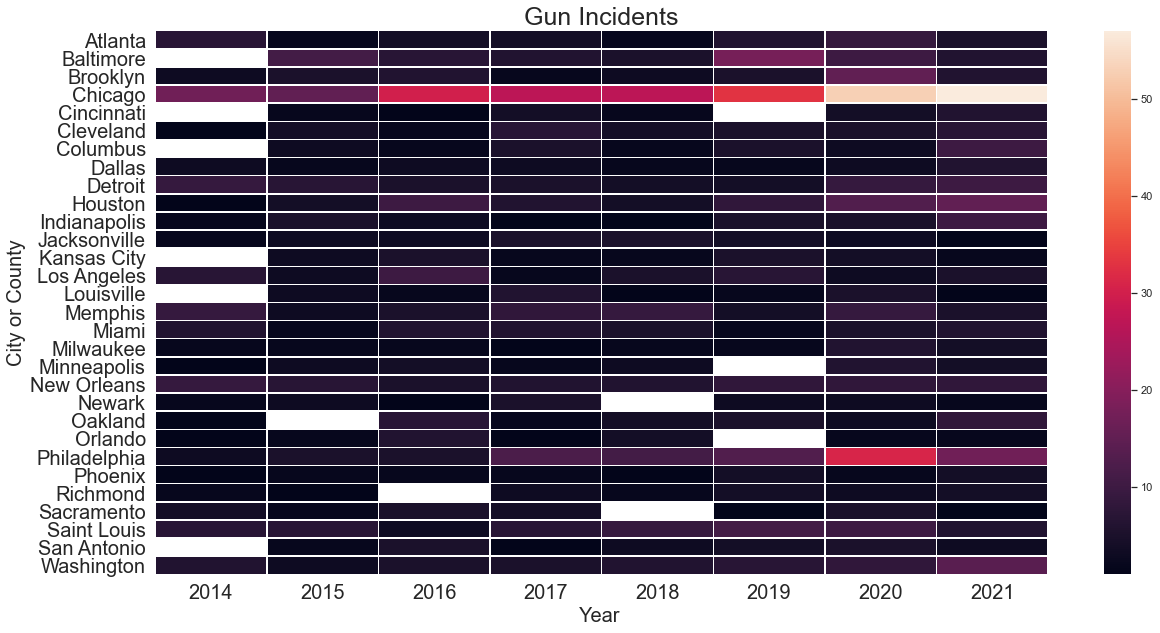

In [58]:
# City Outliers grouping incident counts by Year

#Set dataframe grouped by time period
weekday_df2 = city_df.groupby([city_df.index.year, city_df.city_or_county]).agg({'incident_id':'count' })
weekday_df2.columns = ['_'.join(first) for first in zip(weekday_df2.columns.get_level_values(0))]
weekday_test = weekday_df2
weekday_test = weekday_test.sort_values(by='incident_id', ascending=False)

#pivot table for heatmap
df_wide = weekday_test.pivot_table( index='city_or_county', columns='incident_date', values='incident_id')

#plot
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(df_wide, annot=False, linewidths=.5, ax=ax)

#Set Labels
ax.set_title('Gun Incidents', fontsize=25) 
plt.xlabel("Year ",fontsize=20)
plt.ylabel("City or County",fontsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.xticks(fontsize= 20)
plt.show()